In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pymc3
plt.style.use("ggplot")


In [3]:
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52
iterations = 100000


In [4]:
basic_model = pymc3.Model()
with basic_model:
    theta = pymc3.Beta("theta", alpha = alpha, beta = beta)
    y = pymc3.Binomial("y", n = n, p = theta, observed = z)
    start = pymc3.find_MAP()
    step = pymc3.Metropolis()
    trace = pymc3.sample(iterations, step, start, random_seed = 1, progressbar=True)
    

logp = -10.252, ||grad|| = 15: 100%|██████████| 7/7 [00:00<00:00, 72.41it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 201000/201000 [00:34<00:00, 5782.52draws/s]
The number of effective samples is smaller than 25% for some parameters.


/home/fibo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


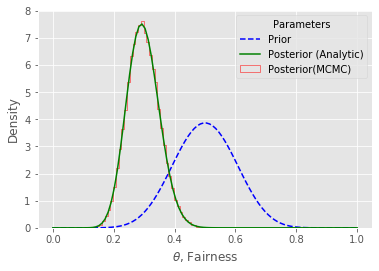

In [8]:
bins = 50
plt.hist(trace["theta"], bins,
        histtype="step", normed = True,
        label = "Posterior(MCMC)", color = "red")
x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x,alpha,beta), "--", label="Prior", color= "blue")
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post),
    label="Posterior (Analytic)", color="green")
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

/home/fibo/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/fibo/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


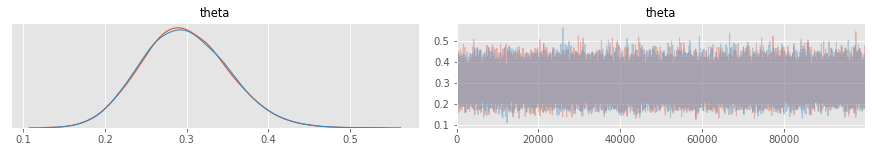

In [9]:
pymc3.traceplot(trace)
plt.show()